In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

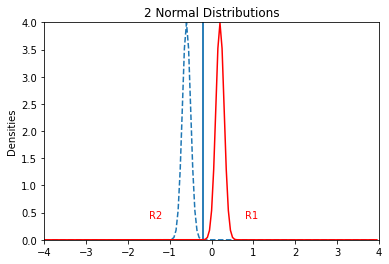

In [3]:
x = np.arange(-4, 4, 0.05)
s1 = 0.1  # standard deviation for y1
mu1 = 0.2  # mean for y1
s2 = 0.1  # square root of variance for y2
mu2 = -0.6 # mean for y2

y1 = np.vstack((x, norm.pdf(x = x, loc = mu1, scale = s1))).T
y2 = np.vstack((x, norm.pdf(x = x, loc = mu2, scale = s2))).T

if (mu1 != mu2) and (s1 != s2):
    c1 = -(mu2 * s1**2 - mu1 * s2**2)/(s2**2 - s1**2) + np.sqrt(((mu2 * s1**2 - mu1 * s2**2)/(s2**2 - s1**2))**2 \
         - ((mu1**2 * s2**2 - mu2**2 * s1**2 - 2 * np.log(s2/s1) * s1**2 * s2**2)/(s2**2 - s1**2)))
    c2 = -(mu2 * s1**2 - mu1 * s2**2)/(s2**2 - s1**2) - np.sqrt(((mu2 * s1**2 - mu1 * s2**2)/(s2**2 - s1**2))**2 \
         - ((mu1**2 * s2**2 - mu2**2 * s1**2 - 2 * np.log(s2/s1) * s1**2 * s2**2)/(s2**2 - s1**2)))

elif (mu1 != mu2) and (s1 == s2):
    if (mu2 < 0) and (mu1 < 0):
        c1 = mu2 = (mu2 - mu1)/2
        c2 = c1
    elif (mu2 < 0) and (mu1 >= 0):
        c1 = mu2 - (mu2 - mu1)/2
        c2 = c1
    elif (mu2 == 0) and (mu1 < 0):
        c1 = - np.abs(mu2 - mu1)/2
        c2 = c1
    elif (mu2 > 0) and (mu1 < 0):
        c1 = mu2 - np.abs(mu2 - mu1)/2
        c2 = c1
    elif (mu2 >= 0) and (mu1 >= 0):
        c1 = np.abs(mu2 - mu1)/2
        c2 = c1

elif (mu1 == mu2) and (s1 == s2):
    c1 = np.inf
    c2 = -np.inf

elif (mu1 == mu2) and (s1 != s2):
    c1 = -(mu2 * s1**2 - mu1 * s2**2)/(s2**2 - s1**2) + np.sqrt(((mu2 * s1**2 - mu1 * s2**2)/(s2**2 - s1**2))**2 \
         - ((mu1**2 * s2**2 - mu2**2 * s1**2 - 2 * np.log(s2/s1) * s1**2 * s2**2)/(s2**2 - s1**2)))
    c2 = -(mu2 * s1**2 - mu1 * s2**2)/(s2**2 - s1**2) - np.sqrt(((mu2 * s1**2 - mu1 * s2**2)/(s2**2 - s1**2))**2 \
         - ((mu1**2 * s2**2 - mu2**2 * s1**2 - 2 * np.log(s2/s1) * s1**2 * s2**2)/(s2**2 - s1**2)))
      
limy = [0, max(list(y1[:, 1]) + list(y1[:, 1]))]
if limy[1] < 0.4:
    limy = [0, 0.41]

fig, ax = plt.subplots()
ax.plot(y2[:,0], y2[:, 1], linestyle = "dashed")
ax.plot(y1[:,0], y1[:, 1], c = "r")
ax.vlines(c1, 0, 4.1)
ax.vlines(c2, 0, 4.1)
ax.set_xlim(-4, 4)
ax.set_ylim(0, 4)
ax.set_ylabel("Densities")
plt.title("2 Normal Distributions")

if (c1 == c2) and (s1 == s2):
    if mu2 < 0:
        ax.text(c1 - 1.3, 0.4, "R2", color = "red")
        ax.text(c1 + 1, 0.4, "R1", color = "red")
    else:
        ax.text(c1 - 1.3, 0.4, "R1", color = "red")
        ax.text(c1 + 1, 0.4, "R2", color = "red")
elif (c1 != c2) and (s2 > s1):
    if mu1 > mu2:
        if s1 >= 1:
            ax.text(c1 - 1.3, 0.4, "R2", color = "red")
            ax.text(c1 + 0.8, 0.4, "R1", color = "red")
            ax.text(c1 - 1.1, 0.4, "R1", color = "red")
        elif (s1 >= 0) and (s1 < 0.5):
            ax.text(c1 - s1 - 0.45, 0.4, "R2", color = "red")
            ax.text(c1 + 0.5, 0.4, "R1", color = "red")
            ax.text(c2 - 0.7, 0.4, "R1", color = "red")
        elif (s1 >= 0.5) and (s1 < 1):
            ax.text(c1 - 1.3, 0.4, "R2", color = "red")
            ax.text(c1 + 0.5, 0.4, "R1", color = "red")
            ax.text(c2 - 0.7, 0.4, "R1", color = "red")
    elif mu1 < mu2:
        ax.text(c1 - 1.3, 0.4, "R1", color = "red")
        ax.text(c1 + 1, 0.4, "R2", color = "red")
        ax.text(c2 - 0.7, 0.4, "R2", color = "red")
    elif mu1 == mu2:
        ax.text(c1 - s1 - 0.4, 0.4, "R1", color = "red")
        ax.text(c1 + 1, 0.4, "R2", color = "red")
        ax.text(c2 - 0.7, 0.4, "R2", color = "red")
elif (c1 != c2) and (s2 < s1):
    if mu1 > mu2:
        ax.text(c1 - 1.3, 0.4, "R2", color = "red")
        ax.text(c1 + 1.3, 0.4, "R1", color = "red")
        ax.text(c2 - 0.9, 0.4, "R1", color = "red")
    elif mu1 < mu2:
        if s2 >= 1:
            ax.text(c1 - 1.3, 0.4, "R2", color = "red")
            ax.text(c1 + 0.8, 0.4, "R1", color = "red")
            ax.text(c2 - 1.1, 0.4, "R1", color = "red")
        elif (s2 >= 0) and (s2 < 0.5):
            ax.text(c1 - s2 - 0.45, 0.4, "R2", color = "red")
            ax.text(c1 + 0.5, 0.4, "R1", color = "red")
            ax.text(c2 - 0.7, 0.4, "R1", color = "red")
        elif (s2 >= 0.5) and (s2 < 1):
            ax.text(c1 - 1.3, 0.4, "R2", color = "red")
            ax.text(c1 + 0.5, 0.4, "R1", color = "red")
            ax.text(c2 - 0.7, 0.4, "R1", color = "red")
    elif mu1 == mu2:
        ax.text(c1 - 1.3, 0.4, "R2", color = "red")
        ax.text(c1 + 1, 0.4, "R1", color = "red")
        ax.text(c2 - 0.7, 0.4, "R1", color = "red")
elif (c1 != c2) and (mu1 == mu2):
    ax.text(c1 - 1.3, 0.4, "R1", color = "red")
    ax.text(c1 + 1, 0.4, "R2", color = "red")
    ax.text(c2 - 0.7, 0.4, "R2", color = "red")

plt.show()